## LAB 10
#### Asignatura: TEL252-S2-2020
#### Docente y Autor: Berioska Contreras Vargas - berioska.contreras@usm.cl

### Visualización de una Elípse: 
Sea un polininomio evaluado en un espacio de números reales R. 

Notamos que los términos algebraicos y sus coeficientes producen un efecto elíptico en la visualización. 

Nos apoyamos en la biblioteca Matplotlib y sus interfaces para proyectar nuestros ejemplos. 

* ref.: https://matplotlib.org/api/pyplot_summary.html 
* ref: https://matplotlib.org/examples/pylab_examples/contour_demo.html

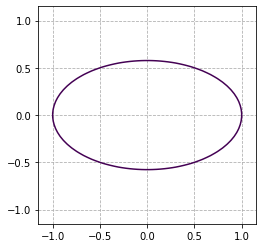

In [8]:
# requirement: python -m pip install -U matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.0, 1.0, 50)
y = np.linspace(-1.0, 1.0, 50)

X, Y = np.meshgrid(x,y)

F = (1)*(X**2) + (3)*(Y**2) - 1.0

fig, ax = plt.subplots()
ax.contour(X,Y,F,[0])
ax.set_aspect('equal')
plt.xlim(-1.15,1.15)
plt.ylim(-1.15,1.15)
plt.grid(linestyle='--')
plt.show()

#### Curva  elíptica simétrica, la elipse: 
Es una curva que consiste en un conjunto de puntos en un plano producida por la suma de las distancias f1 y f2 desde un par de puntos fijos y focales F1 y F2 hacia la curva. 

Donde F1 y F2 se encuentran a una distancia constante 2c. 

El eje mayor representa la distancia constante 2a y a es el eje semimayor. 

El eje menor representa la distancia 2b y b es el eje semimenor.

Es decir, la elípse es una curva plana cerrada con doble eje de simetría. 

* ref: https://mathworld.wolfram.com/Ellipse.html

/home/akiles/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


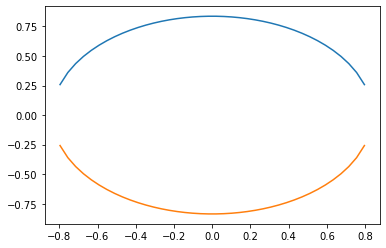

In [23]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 50)
y = np.sqrt(-x**2. + 0.7)
plt.plot(x, y)
plt.plot(x, -y)

#### Grupo Cíclico Extenso: 

La elipse puede ofrecer un grupo multiplicativo alternativo a Zp*.

Una curva elíptica es un tipo especial de ecuación polinomial en un campo finito GF(p).

En definitiva, una curva elíptica en Zp con p>3, es un conjunto de pares (x,y) que pertenecen a Zp, y cumplen 

$y^2= x^3+ax+b (mod p)$.

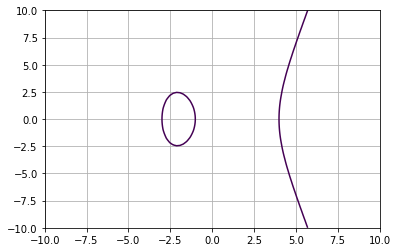

In [11]:
import matplotlib.pyplot as plt 
import numpy as np

y, x = np.ogrid[-10:10:100j, -10:10:100j]

a, b = -13, -12

plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])

plt.grid()
plt.show()

Para establecer un grupo finito es necesario:

**elemento neutro $O$** tal que $P+O=P$ y $P+(-P)=O$.

**inverso del punto** es $P = (x_p,p-y_p)$, aquel punto reflejado a través del eje x.

In [1]:
import numpy as np

def invP(x,y,m):
    yy = (m - y) % m
    iP = np.array([x,yy])
    return iP

P = np.array([5,1])#np.array([15,9])

p = 17#23

print(invP(P[0],P[1],p))

[ 5 16]


### Operación Adición Punto:

Dado un campo finito primo GF(p), la adición y duplicación de puntos en la curva elíptica satisface 

$x_3 = s^2 - x_1 - x_2 (mod p)$.

$y_3 = s(x_1 - x_3) - y_1 (mod p)$. 

Donde, sí $P != 0$, entonces $s = (y_2 - y_1)*(x_2 - x_1)^(-1)$.

In [3]:
import numpy as np
import math

def eea(r0,r1):
    if r0 == 0:
        return (r1, 0, 1)
    else:
        g, s, t = eea(r1 % r0, r0)
        return (g, t - (r1 // r0) * s, s)


def poly():
    ec = [1,0,2,2] 
    return (ec[1])  

def addP(P,Q,a,m):
    S = ((Q[1]-P[1]) * eea(Q[0]-P[0],m)[1]) % m
    x3 = (pow(S,2) - P[0] - Q[0]) % m
    y3 = (S*(P[0] - x3) - P[1]) % m
    return x3, y3

P = [6,3]
Q = [5,16]
m = 17
R =(addP(P,Q,poly(),m))
print(R)

(5, 10)


### Operación Duplicación Punto: 

Dado un campo finito primo GF(p), la adición y duplicación de puntos en la curva elíptica satisface 

$x_3 = s^2 - x_1 - x_2 (mod p)$

$y_3 = s(x_1 - x_3) - y_1 (mod p)$.

Donde, sí $P= 0$, entonces $S= (3x_1^2 +a)*(2y_1)^{-1}$

In [4]:
import numpy as np
import math

def eea(r0,r1):
    if r0 == 0:
        return (r1, 0, 1)
    else:
        g, s, t = eea(r1 % r0, r0)
        return (g, t - (r1 // r0) * s, s)
    return None

def poly():
    ec = [1,0,2,2]
    return (ec[2])

def duP(P,a,m):
    S = ((3*(pow(P[0],2)) + a) * eea(2*P[1],m)[1] ) % m
    x3 = (pow(S,2) - 2*P[0]) % m
    y3 = (S*(P[0] - x3) - P[1]) % m
    return x3, y3

P = [5,1]
m = 17
R = duP(P,poly(),m)
print(R)

(6, 3)


### Cardinalidad:

Dada una curva elíptica E modulo p, el número de puntos en la curva se denota como #E y se encuentra entre los límites 

$  p+1-2 \sqrt{p} < |E| < p+1+2\sqrt{p}$. 

Código adaptado (*).

* ref: https://crypto.stackexchange.com/users/73222/

In [8]:
import math

p = 13

left  = p + 1 - 2*(math.sqrt(p))
right = p + 1 + 2*(math.sqrt(p))

print("left: {0}, right: {1}".format(left, right))

campo = pow(2,p) - pow(2,11)

print("campo: {0}".format(campo))

left: 6.788897449072022, right: 21.21110255092798
campo: 6144


In [10]:
import numpy as np
import math
def eea(r0,r1):
    if r0 == 0:
        return (r1, 0, 1)
    else:
        g, s, t = eea(r1 % r0, r0)
        return (g, t - (r1 // r0) * s, s)
    
    return None

def poly():
    ec = [1,0,2,2]
    return (ec[2])

def oP(P,Q,a,m):
    for i in range(2,19):
        
        if (P[0] == Q[0] and P[1] == Q[1]):
             S=((3*(pow(P[0],2)) + a) * eea(2*P[1],m)[1] ) % m
        else:
             S=((Q[1]-P[1]) * eea(Q[0]-P[0],m)[1]) % m

        x3 = (pow(S,2) - P[0] - Q[0]) % m
        y3 = (S*(P[0] - x3) - P[1]) % m
        
        print(str(i) + "P:\t", (x3,y3))
        
        Q[0], Q[1]=x3, y3 

P = np.array([5,1])
Q = np.array([5,1])
m = 17
print("1P:\t", (P[0],P[1]))
oP(P,Q,poly(),m)

1P:	 (5, 1)
2P:	 (6, 3)
3P:	 (10, 6)
4P:	 (3, 1)
5P:	 (9, 16)
6P:	 (16, 13)
7P:	 (0, 6)
8P:	 (13, 8)
9P:	 (8, 7)
10P:	 (8, 10)
11P:	 (13, 9)
12P:	 (0, 4)
13P:	 (11, 9)
14P:	 (16, 7)
15P:	 (14, 8)
16P:	 (7, 5)
17P:	 (9, 8)
18P:	 (5, 16)


### Actividad:
La multiplicación punto es análoga a la exponenciación de grupos multiplicativos.

El algoritmo de cuadrados-y-multiplicaciones (square-and-multiply) puede ser usado para calcular las operaciones de adición y duplicación de puntos, donde el cómputo del cuadrado se transforma en la operación duplicación y la multiplicación se torna en la adición de P.

Si P es un punto inicial y T es un punto final, luego dP = T y es el número de saltos en la curva elítpica. 

Proponga una solución programática que demuestre la multiplicación punto.

Señale los supuestos escogidos considerando el siguiente pseudocódigo.

In [ ]:
Algorithm:
FOR i = t −1 DOWNTO 0
    T = T +T mod n 
        IF di = 1 
            T = T +P mod n 2
RETURN (T)